In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV


# generate two class dataset
data = pd.read_csv("total 10476 - 42 variables.csv")
data.tail()

,No,IS,Sex,Age,NeuP,NeuC,MonP,MonC,BasP,BasC,...,UA,Cr,TP,CG,TBil,DBil,IBil,AKP,GGT,RAST-ALT
10471,10112,0,1,80,53.1,1.73,5.9,0.19,0.4,1,...,193,52.7,71.3,27.9,27.3,9.9,17.4,50,17,1.12
10472,11993,0,1,80,68.4,4.41,7.3,0.47,0.5,3,...,290,92.6,71.1,28.0,13.8,4.9,8.9,74,35,1.11
10473,10759,0,1,80,53.4,3.04,7.9,0.45,0.1,1,...,268,92.0,64.1,22.7,20.1,6.7,13.4,77,15,1.25
10474,7073,0,1,80,54.9,2.25,4.9,0.20,0.7,3,...,624,154.5,66.5,25.4,10.2,4.2,6.0,36,24,0.62
10475,9661,0,1,80,60.2,4.00,6.4,0.42,0.2,1,...,472,84.5,72.4,30.1,15.7,4.4,11.3,69,15,1.43


In [62]:
data=data.drop(['No'],axis=1)
# Split target and features
X = data.drop(['IS'],axis=1)
X
y = data['IS']
y = y.astype(int)
y
print(X.shape)
print(y.shape)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

# first one
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=5)


(10476, 41)
(10476,)


In [63]:
X_train=X_train.astype(float)

In [64]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8380 entries, 7729 to 2915
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       8380 non-null   float64
 1   Age       8380 non-null   float64
 2   NeuP      8380 non-null   float64
 3   NeuC      8380 non-null   float64
 4   MonP      8380 non-null   float64
 5   MonC      8380 non-null   float64
 6   BasP      8380 non-null   float64
 7   BasC      8380 non-null   float64
 8   EosP      8380 non-null   float64
 9   EosC      8380 non-null   float64
 10  LymP      8380 non-null   float64
 11  LymC      8380 non-null   float64
 12  MPV       8380 non-null   float64
 13  MCHC      8380 non-null   float64
 14  MCH       8380 non-null   float64
 15  RBC       8380 non-null   float64
 16  RDW-CV    8380 non-null   float64
 17  MCV       8380 non-null   float64
 18  PLT       8380 non-null   float64
 19  PDW       8380 non-null   float64
 20  PCT       8380 non-null   f

In [78]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

In [79]:
# Create the RFE object and compute a cross-validated score.
svc = RandomForestClassifier(random_state=25)
# The "accuracy" scoring is proportional to the number of correct
# classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='roc_auc',
              min_features_to_select=min_features_to_select)
rfecv.fit(X_train, y_train)

print("Optimal number of features defined by auc: %d" % rfecv.n_features_)


rfecv2 = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy',
              min_features_to_select=min_features_to_select)
rfecv2.fit(X, y)

print("Optimal number of features defined by accuracy : %d" % rfecv2.n_features_)

Optimal number of features defined by auc: 34
Optimal number of features defined by accuracy : 31


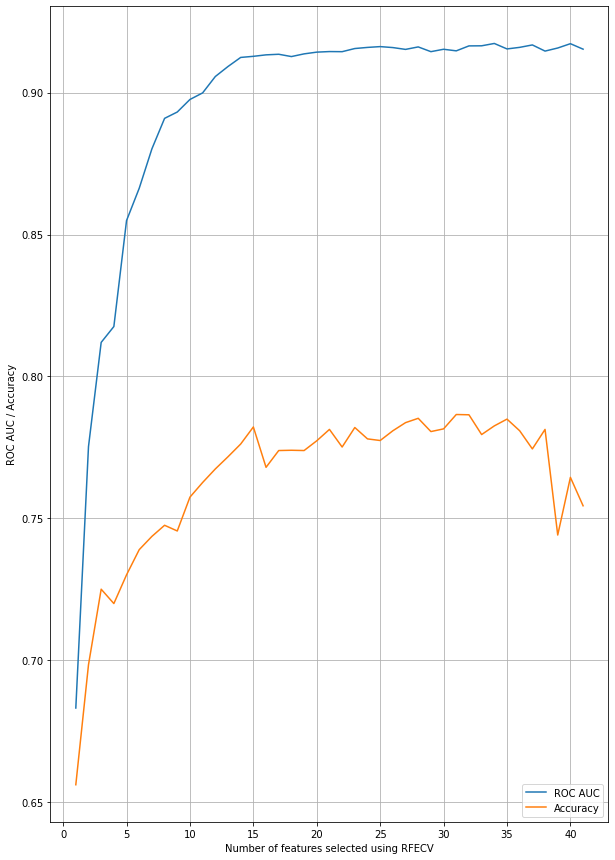

In [82]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected using RFECV")
plt.ylabel("ROC AUC / Accuracy")

plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_, label = 'ROC AUC')

plt.plot(range(min_features_to_select,
               len(rfecv2.grid_scores_) + min_features_to_select),
         rfecv2.grid_scores_, label = 'Accuracy')


plt.legend(loc='lower right')
plt.grid(True)

plt.show()

In [81]:
cols = list(X.columns)
rfecv2acc = pd.Series(rfecv2.support_, index = cols)
selected_features = rfecv2acc[rfecv2acc==True].index
print(selected_features)

Index(['Age', 'NeuP', 'NeuC', 'MonP', 'MonC', 'EosP', 'LymP', 'LymC', 'MCHC',
       'MCH', 'RBC', 'RDW-CV', 'MCV', 'PLT', 'PCT', 'Hgb', 'Glu', 'TC', 'TG',
       'LDL-C', 'HDL-C', 'Alb', 'BUN', 'UA', 'Cr', 'TP', 'CG', 'DBil', 'IBil',
       'AKP', 'RAST-ALT'],
      dtype='object')


In [43]:
############################################################################################################

In [44]:
## 2  Filter Method (Pearson Correlation)

In [45]:
"""Here we will first plot the Pearson correlation heatmap and see the correlation of independent variables with the 
output variable Cardia_adverse= cardiaovascular adverse events. We will only select features which has correlation of 
above 0.5 (taking absolute value) with the 
output variable.
"""

'Here we will first plot the Pearson correlation heatmap and see the correlation of independent variables with the \noutput variable Cardia_adverse= cardiaovascular adverse events. We will only select features which has correlation of \nabove 0.5 (taking absolute value) with the \noutput variable.\n'

In [46]:
"""The correlation coefficient has values between -1 to 1
— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
— A value closer to 1 implies stronger positive correlation
— A value closer to -1 implies stronger negative correlation"""

'The correlation coefficient has values between -1 to 1\n— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)\n— A value closer to 1 implies stronger positive correlation\n— A value closer to -1 implies stronger negative correlation'

In [65]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

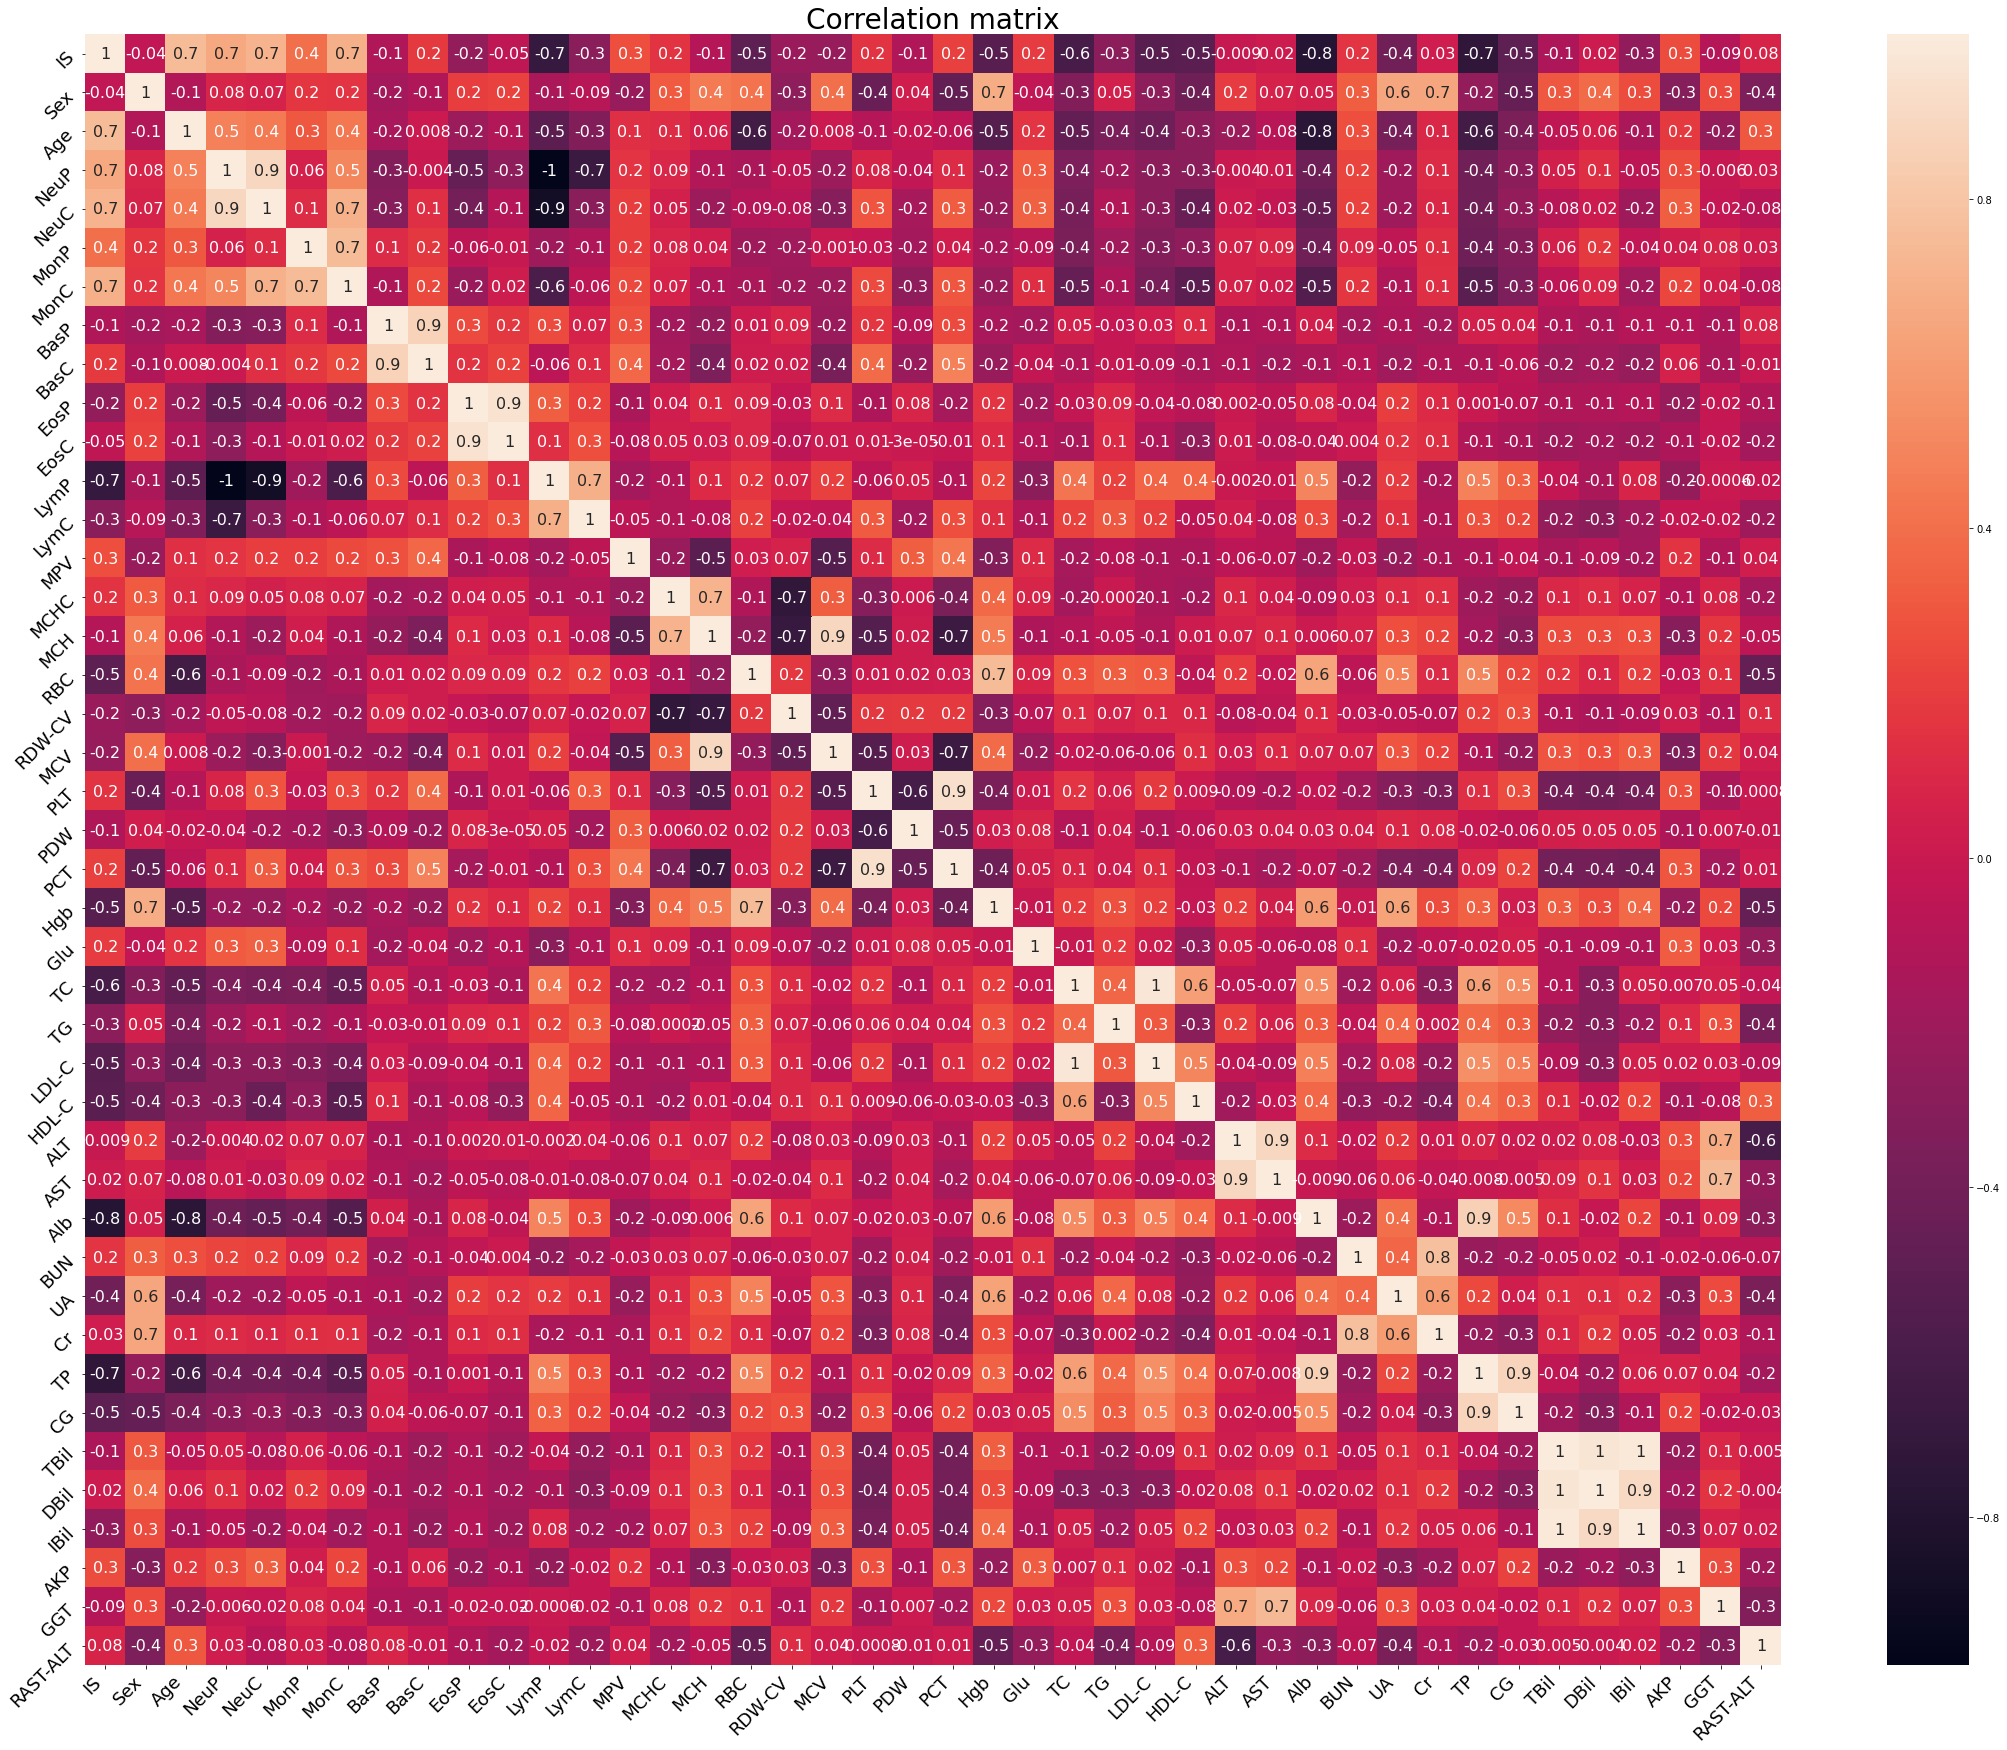

In [105]:
#Using Pearson Correlation
plt.figure(figsize=(38,30))
cor = data.corr(method = "pearson")
annot_kws={'fontsize':16, 
           'verticalalignment':'center'}
ax=sns.heatmap(cor.corr(), annot=True,fmt ='0.1g',annot_kws=annot_kws)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=45, horizontalalignment='right')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')
# plt.xlabel('x.num')#设置坐标名称
# plt.ylabel('y.num')
plt.title('Correlation matrix',fontsize=28)#标题
plt.show()


In [106]:
#Correlation with output variable
cor_target = abs(cor["IS"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

IS        1.000000
Age       0.402981
NeuP      0.358735
NeuC      0.382088
MonP      0.172474
MonC      0.344740
EosP      0.109928
LymP      0.386498
MCHC      0.114824
RBC       0.257919
RDW-CV    0.154247
MCV       0.148679
PCT       0.107464
Hgb       0.289903
TC        0.288354
LDL-C     0.200110
HDL-C     0.262181
Alb       0.368450
UA        0.174845
TP        0.383639
CG        0.230054
IBil      0.106434
AKP       0.110221
Name: IS, dtype: float64

In [50]:
## 3 - Embedded method (LASSO)

In [69]:
reg = LassoCV()
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train,y_train))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.007357
Best score using built-in LassoCV: 0.458665


In [70]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 26 variables and eliminated the other 15 variables


Text(0.5, 1.0, 'Feature importance using LASSO Model')

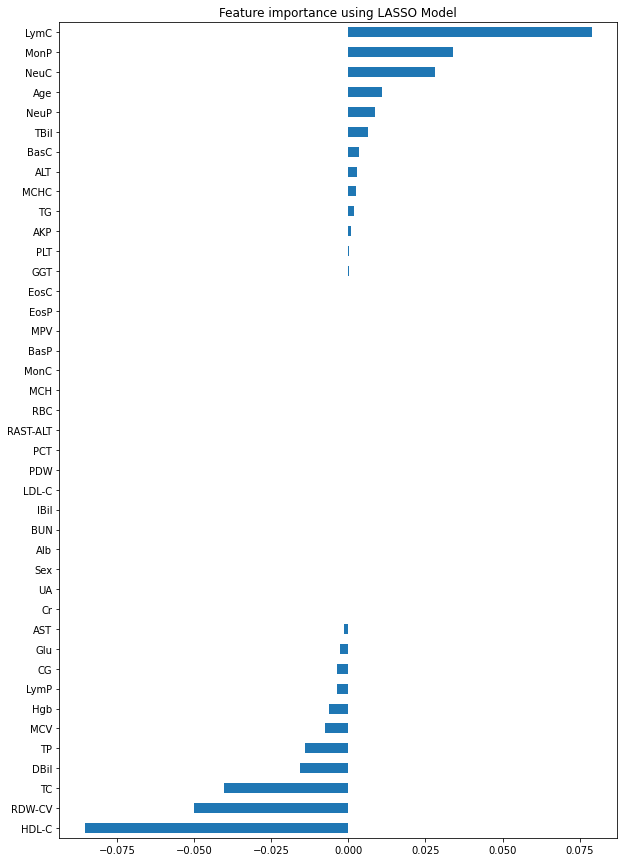

In [71]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 15.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using LASSO Model")

In [54]:
print((coef != 0))

sex         False
age          True
NeuP         True
NeuC         True
MonP         True
MonC        False
BasP        False
BasC         True
EosP        False
EosC        False
LymP         True
LymC         True
MPV         False
MCHC         True
MCH         False
RBC         False
RDW-CV       True
MCV          True
PLT          True
PDW         False
PCT         False
Hgb          True
Glu          True
TC           True
TG           True
LDL-C       False
HDL-C        True
ALT          True
AST          True
Alb         False
BUN         False
UA           True
Cr           True
TP           True
CG           True
TBil         True
DBil         True
IBil        False
AKP          True
GGT          True
RAST-ALT    False
dtype: bool


In [55]:
print (imp_coef != 0)

HDL-C        True
RDW-CV       True
TC           True
DBil         True
TP           True
MCV          True
Hgb          True
LymP         True
CG           True
Glu          True
AST          True
Cr           True
UA           True
sex         False
Alb         False
BUN         False
IBil        False
LDL-C       False
PDW         False
PCT         False
RAST-ALT    False
RBC         False
MCH         False
MonC        False
BasP        False
MPV         False
EosP        False
EosC        False
GGT          True
PLT          True
AKP          True
TG           True
MCHC         True
ALT          True
BasC         True
TBil         True
NeuP         True
age          True
NeuC         True
MonP         True
LymC         True
dtype: bool
